# Data Mining and Machine Learning Assignment

## Decision Trees

### My goal in this notebook is to use decision trees in order to analyse health insurance data to predict the likely hood that an individual is a smoker or not

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [101]:
df = pd.read_csv('data/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
X = df.drop('smoker', axis='columns')
y = df['smoker']
print(y.shape)

(1338,)


In [103]:
X = pd.get_dummies(X)
print(X.columns)
feature_names = X.columns
print(X)
X.head()

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')
      age     bmi  children      charges  sex_female  sex_male  \
0      19  27.900         0  16884.92400           1         0   
1      18  33.770         1   1725.55230           0         1   
2      28  33.000         3   4449.46200           0         1   
3      33  22.705         0  21984.47061           0         1   
4      32  28.880         0   3866.85520           0         1   
...   ...     ...       ...          ...         ...       ...   
1333   50  30.970         3  10600.54830           0         1   
1334   18  31.920         0   2205.98080           1         0   
1335   18  36.850         0   1629.83350           1         0   
1336   21  25.800         0   2007.94500           1         0   
1337   61  29.070         0  29141.36030           1         0   

      region_northea

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0


In [111]:
X_train, X_test, y_train, y_test = train_test_split( X, y,stratify=y, random_state=1)

In [118]:
# Perform cross validation varying the depth of the tree. 
# Make predictions in each loop and calculate F1 and print

# Using F1 because of the unbalanced dataset(80% = no)

for d in range(2,12):
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean(), "F1: ")

Depth:  2 Accuracy: 0.9202238805970151 F1: 
Depth:  3 Accuracy: 0.9561094527363185 F1: 
Depth:  4 Accuracy: 0.9551094527363183 F1: 
Depth:  5 Accuracy: 0.9541343283582091 F1: 
Depth:  6 Accuracy: 0.9471492537313433 F1: 
Depth:  7 Accuracy: 0.9521442786069653 F1: 
Depth:  8 Accuracy: 0.9521542288557214 F1: 
Depth:  9 Accuracy: 0.9511492537313433 F1: 
Depth:  10 Accuracy: 0.9501641791044776 F1: 
Depth:  11 Accuracy: 0.9531442786069653 F1: 


In [119]:
def nullPredictor(X):
    return ['no' for X_val in X]

# Null model for regression is the avg of the target.
# As long as model is better than the null value it's good.

In [132]:
tree = DecisionTreeClassifier(max_depth=7)
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_hat = tree.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_hat))
print("Test F1: ",f1_score(y_test, y_hat, average=None))

Test Accuracy:  0.9701492537313433
Test F1:  [0.98134328 0.92537313]


In [133]:
y_null_hat = nullPredictor(y_test)

print("Null Accuracy: ",accuracy_score(y_test, y_null_hat))
print("Null F1: ",f1_score(y_test, y_null_hat, average=None))

Null Accuracy:  0.7940298507462686
Null F1:  [0.88519135 0.        ]


### As seen above, the Test accuracy and F1 are higher than the null accuracy and null F1, indicating that the model is accurate and predictive.

In [137]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("True negatives:", tn, ", False Positives:", fp, ", False Negatives:", fn, ", True Positives:", tp)

CM [[263   3]
 [  7  62]]

True negatives: 263 , False Positives: 3 , False Negatives: 7 , True Positives: 62


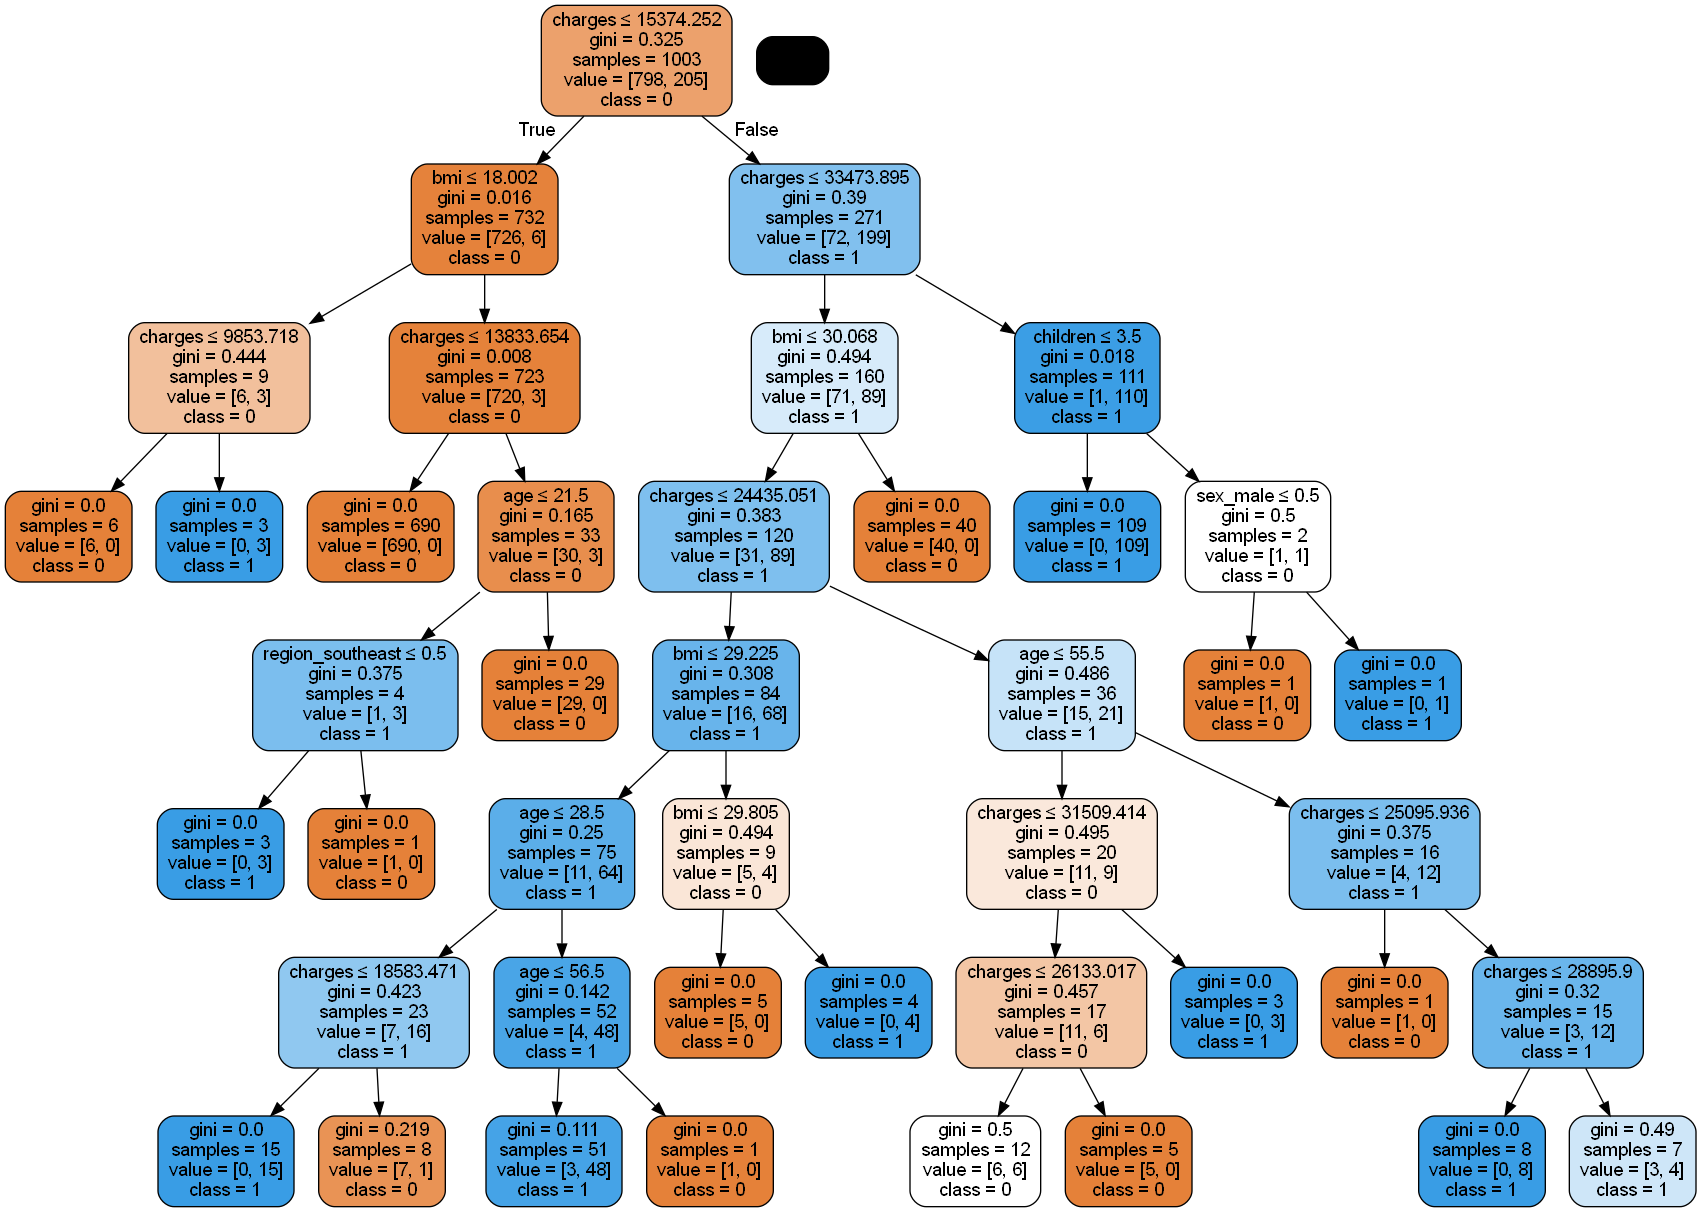

In [135]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
               special_characters=True, class_names=['0','1'],
                feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Plots/insurance.png')
Image(graph.create_png())